In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('student_3.csv')
dataset.head(6)

,rollno,name,written_marks,practical_marks,total,pass
0,1,Aarav Sharma,380,50,430,Yes
1,2,Prisha Koirala,345,45,390,Yes
2,3,Rohan Thapa,190,20,210,No
3,4,Sita Gurung,240,38,278,Yes
4,5,Manish Shrestha,165,24,189,No
5,6,Anisha Bhandari,310,32,342,Yes


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rollno           40 non-null     int64 
 1   name             40 non-null     object
 2   written_marks    40 non-null     int64 
 3   practical_marks  40 non-null     int64 
 4   total            40 non-null     int64 
 5   pass             40 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.0+ KB


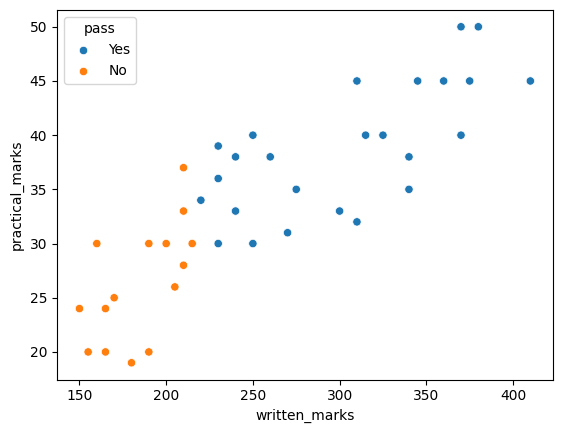

In [4]:
sns.scatterplot(x='written_marks', y='practical_marks', data = dataset ,hue = 'pass')
plt.show()

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
one = OneHotEncoder()
new_data = one.fit_transform(dataset[['pass']]).toarray()

In [7]:
en_data = pd.DataFrame(new_data , columns=['no','yes'])
en_data.head(6)

,no,yes
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,0.0,1.0


In [8]:
en_data = en_data.drop(columns='yes')
dataset['en_data'] = en_data
dataset.head(6)

,rollno,name,written_marks,practical_marks,total,pass,en_data
0,1,Aarav Sharma,380,50,430,Yes,0.0
1,2,Prisha Koirala,345,45,390,Yes,0.0
2,3,Rohan Thapa,190,20,210,No,1.0
3,4,Sita Gurung,240,38,278,Yes,0.0
4,5,Manish Shrestha,165,24,189,No,1.0
5,6,Anisha Bhandari,310,32,342,Yes,0.0


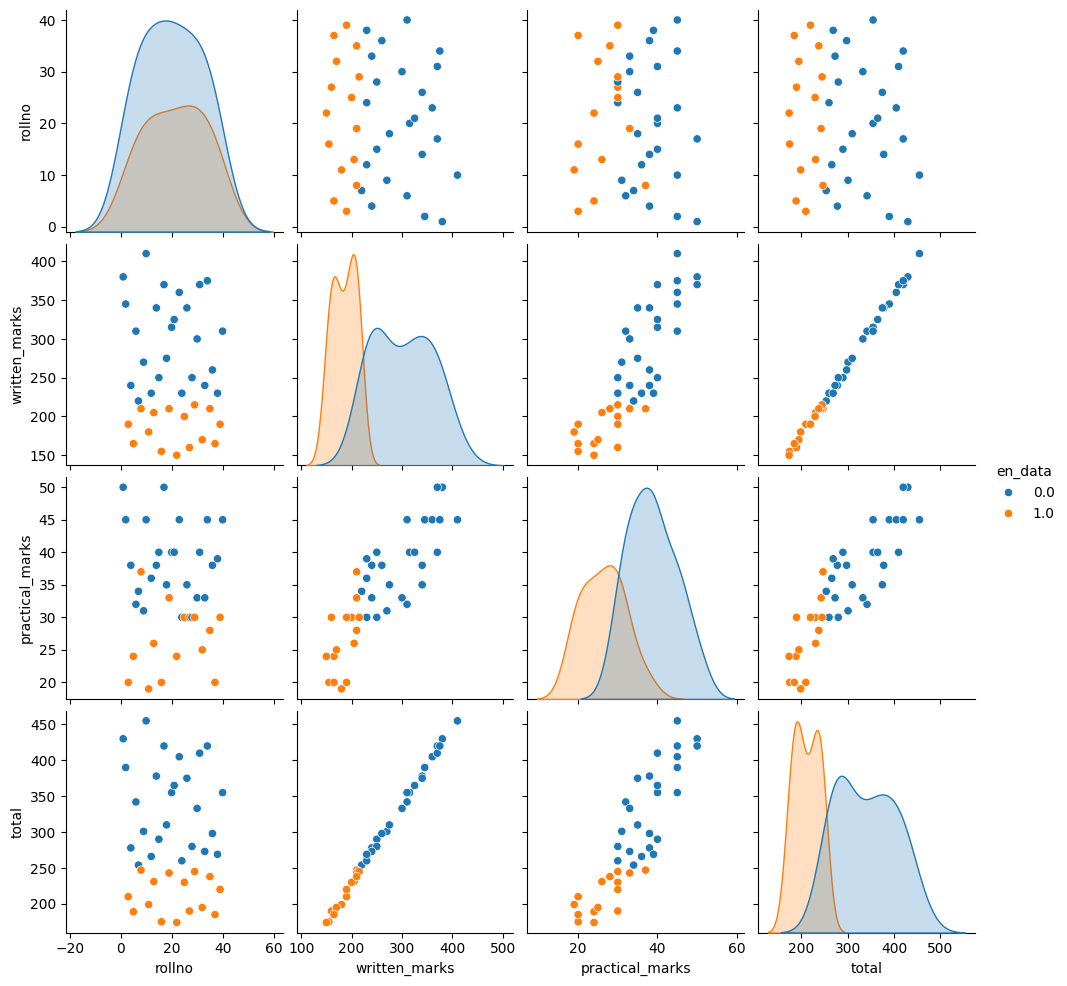

In [9]:
sns.pairplot(data=dataset,hue='en_data')
plt.show()

In [10]:
x= dataset[['written_marks','practical_marks']]
y= dataset['en_data']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr =LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
lr.score(x_test,y_test) 

1.0

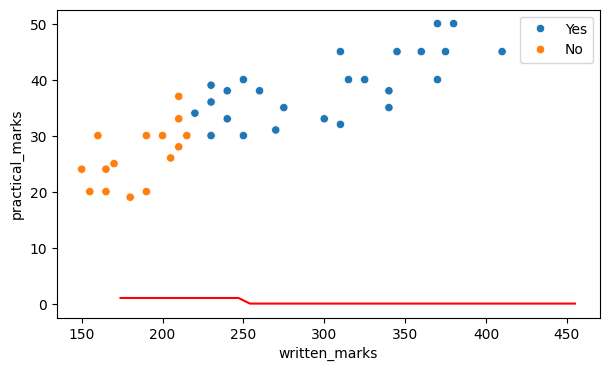

In [16]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='written_marks', y='practical_marks', data = dataset ,hue = 'pass')
sns.lineplot(x='total', y= lr.predict(x),data = dataset , color ='red')
plt.show()

In [18]:
from mlxtend.plotting import plot_decision_regions

In [20]:
y = y.astype(int)

c:\Users\Acer\Desktop\Samir\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


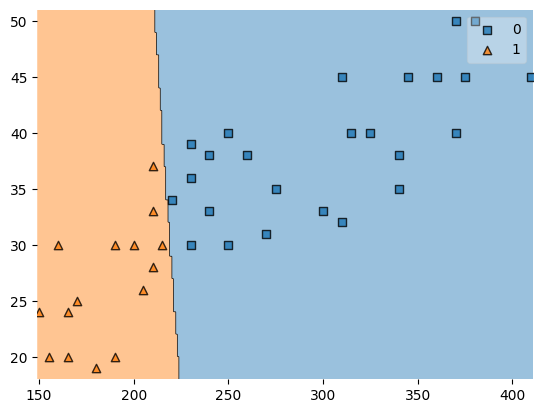

In [21]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=lr)
plt.show()